In [1]:
import synthpop 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

/Users/mhuston/anaconda3/lib/python3.11/site-packages/pydantic/_internal/_config.py:341: UserWarning: Valid config keys have changed in V2:
* 'keep_untouched' has been renamed to 'ignored_types'
  warnings.warn(message, UserWarning)


In [2]:
flds = np.loadtxt('field_centers_overguide.txt', skiprows=1)
frds = SkyCoord(l=flds[:,0], b=flds[:,1], unit=u.deg, frame='galactic').transform_to('icrs')

In [3]:
ccyc = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

In [4]:
# Imports
import pysiaf
from pysiaf.utils.rotations import attitude
# Read in the Roman SIAF
rsiaf = pysiaf.Siaf('Roman')
wfi_cen=rsiaf['WFI_CEN']
roman_apertures = [f'WFI{i + 1:02}_FULL' for i in range(18)]

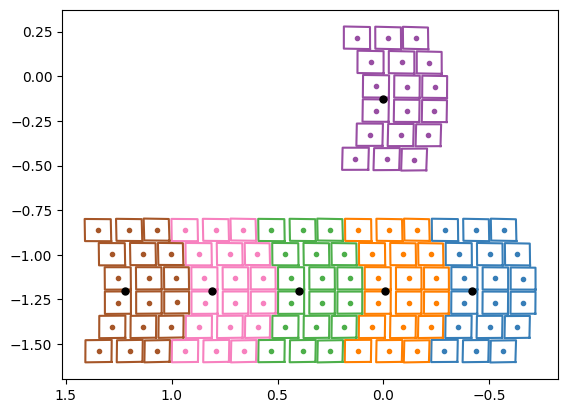

In [46]:
# Set the boresight position and roll angle
cent_list = np.zeros((len(frds)*len(roman_apertures),2))
field_list = []; chip_list = []
k=0
for i,frd in enumerate(frds):
    boresight_ra = frd.ra.degree
    boresight_dec = frd.dec.degree
    pa_v3 = 90.75
    att = attitude(wfi_cen.V2Ref, wfi_cen.V3Ref, boresight_ra, boresight_dec, pa_v3)

    for j,rap in enumerate(roman_apertures):
        wfi_ap = rsiaf[rap]
        wfi_ap.set_attitude_matrix(att)
        ra,dec = wfi_ap.closed_polygon_points('sky')
        lb = SkyCoord(ra=ra, dec=dec, unit=u.deg, frame='icrs').transform_to('galactic')
        mid_l = np.mean((lb.l.degree-360*(lb.l.degree>180))[:-1])
        mid_b = np.mean(lb.b.degree[:-1])
        cent_list[k]=[np.round(mid_l,3), np.round(mid_b,3)]
        field_list.append(i), chip_list.append(j)
        plt.plot(lb.l.degree-360*(lb.l.degree>180),lb.b.degree,c=ccyc[i])
        plt.plot(mid_l,mid_b, '.', c=ccyc[i])
        k+=1
    wfi_cen.set_attitude_matrix(att)
    radec = wfi_cen.idl_to_sky(0, 0)
    lb = SkyCoord(ra=radec[0],dec=radec[1], unit=u.deg, frame='icrs').transform_to('galactic')
    plt.plot(lb.l.degree-360*(lb.l.degree>180), lb.b.degree, 'k.', markersize=10)
plt.gca().invert_xaxis()

In [47]:
df = pd.DataFrame({'Nfield': field_list,
                   'Nchip': chip_list,
                   'l': cent_list[:,0],
                   'b': cent_list[:,1]})

In [48]:
df

,Nfield,Nchip,l,b
0,0,0,-0.382,-1.132
1,0,1,-0.529,-1.132
2,0,2,-0.659,-1.133
3,0,3,-0.356,-0.996
4,0,4,-0.502,-0.997
...,...,...,...,...
103,5,13,-0.081,-0.329
104,5,14,-0.212,-0.331
105,5,15,0.132,-0.462
106,5,16,-0.015,-0.464
